# Week 1 Exercise 1.2- Group 2
**s232161-Xiaoyu Yan 25%**\
**s Marcel Zelent 25%**\
**s Linna Li 25%**\
**s Nicolaus 25%**

In [421]:
import numpy as np
from activation import ActivationFunction


In [422]:
class Perceptron:
    """ 
      Perceptron neuron model
      Parameters
      ----------
      n_inputs : int
         Number of inputs
      act_f : Subclass of `ActivationFunction`
         Activation function
    """
    def __init__(self, n_inputs, act_f):
        """
         Perceptron class initialization
         TODO: Write the code to initialize weights and save the given activation function
        """
        if not isinstance(act_f, type) or not issubclass(act_f, ActivationFunction):
            raise TypeError('act_f has to be a subclass of ActivationFunction (not a class instance).')
        # weights
        np.random.seed(42)
        self.w = np.random.normal(0, 1, (n_inputs))#np.random.normal(mean, standard deviation, size)
        # activation function
        self.f = act_f()
        self.bias = np.random.normal(0, 1, (1))

        if self.f is not None and not isinstance(self.f, ActivationFunction):
            raise TypeError("self.f should be a class instance.")

    def activation(self, x):
        """
         It computes the activation `a` given an input `x`
         TODO: Fill in the function to provide the correct output
         NB: Remember the bias
        """
        a = np.dot(self.w.T, x) + self.bias
        return a

    def output(self, a):
        """
         It computes the neuron output `y`, given the activation `a`
         TODO: Fill in the function to provide the correct output
        """
        y = self.f.forward(a)
        return y

    def predict(self, x):
        """
         It computes the neuron output `y`, given the input `x`
         TODO: Fill in the function to provide the correct output
        """
        a = self.activation(x)
        y_out = self.output(a)
        return y_out

    def gradient(self, a):
        """
         It computes the gradient of the activation function, given the activation `a`
        """
        return self.f.gradient(a)

### 1.2-1

In [423]:
class Sigmoid(ActivationFunction):
    """ 
      Sigmoid activation: `f(x) = 1/(1+e^(-x))`
    """
    def forward(self, x):
        """
         Activation function output.
         TODO: Change the function to return the correct value, given input `x`.
        """
        return 1/(1+np.exp(-x))

    def gradient(self, x):
        """
         Activation function derivative.
         TODO: Change the function to return the correct value, given input `x`.
        """
        return self.forward(x) * (1 - self.forward(x))

In [424]:
class LinearActivation(ActivationFunction):
    """ 
      Linear activation: `f(x) = x`
    """
    def forward(self, x):
        """
         Activation function output.
         TODO: Change the function to return the correct value, given input `x`.
        """
        return x

    def gradient(self, x):
        """
         Activation function derivative.
         TODO: Change the function to return the correct value, given input `x`.
        """
        return 1

In [425]:
class Layer:
    def __init__(self, num_inputs, num_units, act_f):
        """ 
         Initialize the layer, creating `num_units` perceptrons with `num_inputs` each. 
        """
        # TODO Create the perceptrons required for the layer
        self.num_units = num_units
        self.ps = []
        for i in range(num_units):
            self.ps.append(Perceptron(num_inputs, act_f))

    def activation(self, x):
        """ Returns the activation `a` of all perceptrons in the layer, given the input vector`x`. """
        return np.array([p.activation(x) for p in self.ps])

    def output(self, a):
        """ Returns the output `o` of all perceptrons in the layer, given the activation vector `a`. """
        return np.array([p.output(ai) for p, ai in zip(self.ps, a)])

    def predict(self, x):
        """ Returns the output `o` of all perceptrons in the layer, given the input vector `x`. """
        return np.array([p.predict(x) for p in self.ps])

    def gradient(self, a):
        """ Returns the gradient of the activation function for all perceptrons in the layer, given the activation vector `a`. """
        return np.array([p.gradient(ai) for p, ai in zip(self.ps, a)])

    def update_weights(self, dw, dbias):
       """ 
       Update the weights of all of the perceptrons in the layer, given the weight change of each.
       Input size: (n_inputs+1, n_units)
       """
       for i in range(self.num_units):
          self.ps[i].w += dw[:,i]
          self.ps[i].bias += dbias

    @property
    def w(self):
        """
         Returns the weights of the neurons in the layer.
         Size: (n_inputs+1, n_units)
        """
        return np.array([p.w for p in self.ps]).T
    
    @property
    def bias(self):
        """
         Returns the bias of the neurons in the layer.
         Size: (1, n_units)
        """
        return np.array([p.bias for p in self.ps]).T

    def import_weights(self, w):
        """ 
         Import the weights of all of the perceptrons in the layer.
         Input size: (n_inputs+1, n_units)
        """
        for i in range(self.num_units):
           self.ps[i].w = w[:,i]

In [426]:
layer = Layer(2, 5, Sigmoid)
pre = layer.predict([np.pi, 1])
print(pre)
print(layer.w)
print(layer.bias)

[[0.88794279]
 [0.88794279]
 [0.88794279]
 [0.88794279]
 [0.88794279]]
[[ 0.49671415  0.49671415  0.49671415  0.49671415  0.49671415]
 [-0.1382643  -0.1382643  -0.1382643  -0.1382643  -0.1382643 ]]
[[0.64768854 0.64768854 0.64768854 0.64768854 0.64768854]]


### 1.2-3
5 inputs

In [427]:
class MLP:
    """ 
      Multi-layer perceptron class

    Parameters
    ----------
    n_inputs : int
       Number of inputs
    n_hidden_units : int
       Number of units in the hidden layer
    n_outputs : int
       Number of outputs
    alpha : float
       Learning rate used for gradient descent
    """
    def __init__(self, num_inputs, n_hidden_units, n_outputs, alpha=0.01):
       self.num_inputs = num_inputs
       self.n_hidden_units = n_hidden_units
       self.n_outputs = n_outputs

       self.alpha = alpha

       # TODO: Define a hidden layer and the output layer
       self.l1 = Layer(self.num_inputs, self.n_hidden_units, Sigmoid)# hidden layer 1
       self.l_out = Layer(self.n_hidden_units, self.n_outputs, LinearActivation) # output layer

    def predict(self, x):
        """ 
        Forward pass prediction given the input x
        TODO: Write the function
        """
        out1 = self.l1.predict(x)
        out2 = self.l_out.predict(out1)
        return out2

    def train(self, inputs, outputs):
        """
          Train the network 

        Parameters
        ----------
        `x` : numpy array
           Inputs (size: n_examples, n_inputs)
        `t` : numpy array
           Targets (size: n_examples, n_outputs)

        TODO: Write the function to iterate through training examples and apply gradient descent to update the neuron weights
        """
        # Loop over training examples
        dw1 = np.zeros_like(self.l1.w)
        dw_out = np.zeros_like(self.l_out.w)
        N = inputs.shape[1]
        iter = 0

        for x,t in zip(inputs, outputs):
            # Forward pass
            iter += 1
            a1 = self.l1.activation(x)
            o1 = self.l1.output(a1)
            a_out = self.l_out.activation(o1)
            o_out = self.l_out.output(a_out)
         
            error = o_out - t

            # print("a1: ",a1)
            # print("o1: ",o1)
            # print("a_out: ",a_out)
            # print("o_out: ",o_out)
            # print("error: ",error)
            print("iter: ",iter)

            # Backpropagation
            delta_out = (error) * self.l_out.gradient(a_out)
            delta1 = self.l1.gradient(a1) * self.l_out.w.dot(delta_out)

            print("delta out: ", delta_out)
            print("delta1: ",delta1)
            
            # o0 = np.insert(x, 0, 1)  # Add bias term
            # o1 = np.insert(o1, 0, 1)  # Add bias term

            # dw1 += delta1.reshape(-1, 1).dot(o0.reshape(1, -1)).T
            # dw_out += np.outer(o1, delta_out)

            # dw1 += delta1.reshape(-1, 1).dot(x.reshape(1, -1)).T
            # dw_out += np.outer(o1, delta_out)

            dw1 += -self.alpha * delta1/N*x
            dw_out += -self.alpha * delta_out/N*o1

            print("dw1: ",dw1)
            print("dw_out: ",dw_out)            
        
        dbias_out = -self.alpha * delta_out/N
        dbias_1 = -self.alpha * delta1/N

        print("dbias_out: ",dbias_out)
        print("dbias_1: ",dbias_1)

        self.l1.update_weights(dw1, 0)
        self.l_out.update_weights(dw_out, 0)

        # Forward pass


        # Backpropagation


        # Add weight change contributions to temporary array
         
        # Update weights
      
        return None # remove this line

    def export_weights(self):
        return [self.l1.w, self.l2.w]
   
    def import_weights(self, ws):
        if ws[0].shape == (self.l1.n_units, self.n_inputs+1) and ws[1].shape == (self.l2.n_units, self.l1.n_units+1):
            print("Importing weights..")
            self.l1.import_weights(ws[0])
            self.l2.import_weights(ws[1])
        else:
            print("Sizes do not match")

In [428]:
xdata = [np.pi, 1]
mlp = MLP(2, 3, 1)
mlp.predict(xdata)
print(mlp.l1.w)
print(mlp.l_out.w)

[[ 0.49671415  0.49671415  0.49671415]
 [-0.1382643  -0.1382643  -0.1382643 ]]
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


In [429]:
def calc_prediction_error(model, x, t):
    """
    Input:
    x: xdata input
    t: ground truth
    """
    y = []
    for i in range(x.shape[0]):
        y.append(model.predict(x[i, :]))
    y = np.array(y).T[0]
    n = t.shape[0]
    error = np.sum((y - t)**2) / n
    return error

In [430]:
data = np.array( [ [0.5, 0.5, 0], [1.0, 0, 0], [2.0, 3.0, 0], [0, 1.0, 1], [0, 2.0, 1], [1.0, 2.2, 1] ] )
xdata = data[:,:2]
ydata = data[:,2]
error = calc_prediction_error(mlp, xdata, ydata)
print(error)

3.257035366351461


In [431]:
data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
xdata = data[:, :2]
ydata = data[:, 2]
error = calc_prediction_error(mlp, xdata, ydata)
print(error)

3.213701451707424


In [432]:
ydata

array([0, 1, 1, 0])

In [433]:
xor = MLP(2, 2, 1)
error = []
for epoch in range(2):
    xor.train(xdata, ydata)
    error.append(calc_prediction_error(xor, xdata, ydata))
for i in range(4):
    print(xor.predict(xdata[i, :]))


iter:  1
delta out:  [[0.88300706]]
delta1:  [[ 0.09890963]
 [-0.02753228]]
dw1:  [[0. 0.]
 [0. 0.]]
dw_out:  [[-0.00289842]
 [-0.00289842]]
iter:  2
delta out:  [[-0.12839806]]
delta1:  [[-0.014953  ]
 [ 0.00416228]]
dw1:  [[ 0.00000000e+00  7.47649820e-05]
 [ 0.00000000e+00 -2.08114223e-05]]
dw_out:  [[-0.00249739]
 [-0.00249739]]
iter:  3
delta out:  [[-0.08043189]]
delta1:  [[-0.00731852]
 [ 0.00203717]]
dw1:  [[ 3.65926092e-05  7.47649820e-05]
 [-1.01858413e-05 -2.08114223e-05]]
dw_out:  [[-0.00219236]
 [-0.00219236]]
iter:  4
delta out:  [[0.91016837]]
delta1:  [[ 0.08863454]
 [-0.02467212]]
dw1:  [[-0.00040658 -0.00036841]
 [ 0.00011317  0.00010255]]
dw_out:  [[-0.00552477]
 [-0.00552477]]
dbias_out:  [[-0.00455084]]
dbias_1:  [[-0.00044317]
 [ 0.00012336]]
iter:  1
delta out:  [[0.87575315]]
delta1:  [[ 0.09700599]
 [-0.0283972 ]]
dw1:  [[0. 0.]
 [0. 0.]]
dw_out:  [[-0.00287461]
 [-0.00287461]]
iter:  2
delta out:  [[-0.13529082]]
delta1:  [[-0.01558003]
 [ 0.00456086]]
dw1:  [

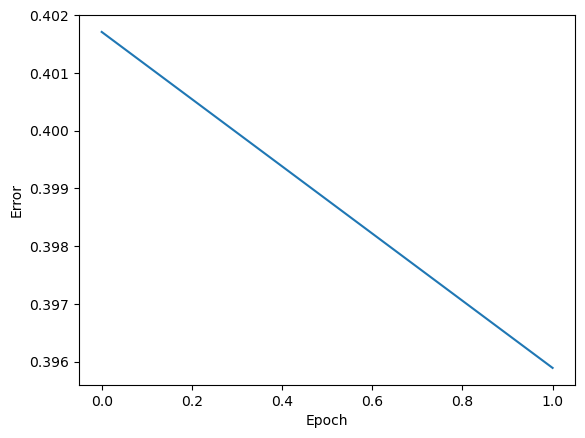

In [434]:
# Plot the error
import matplotlib.pyplot as plt
plt.plot(error)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


In [435]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def linear_activation(x):
    return x

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_hidden = np.random.rand(hidden_size, input_size)
    biases_hidden = np.zeros((hidden_size, 1))

    weights_output = np.random.rand(output_size, hidden_size)
    biases_output = np.zeros((output_size, 1))

    parameters = {
        'weights_hidden': weights_hidden,
        'biases_hidden': biases_hidden,
        'weights_output': weights_output,
        'biases_output': biases_output
    }

    return parameters

def forward_propagation(inputs, parameters):
    # Hidden layer
    hidden_activation = sigmoid(np.dot(parameters['weights_hidden'], inputs) + parameters['biases_hidden'])

    # Output layer
    output_activation = linear_activation(np.dot(parameters['weights_output'], hidden_activation) + parameters['biases_output'])

    cache = {
        'hidden_activation': hidden_activation,
        'output_activation': output_activation
    }

    return output_activation, cache

def backward_propagation(inputs, outputs, cache, parameters, learning_rate):
    m = inputs.shape[1]

    # Output layer
    output_error = outputs - cache['output_activation']
    output_delta = output_error  # Linear activation function derivative is 1

    # Hidden layer
    hidden_error = np.dot(parameters['weights_output'].T, output_delta)
    hidden_delta = cache['hidden_activation'] * (1 - cache['hidden_activation']) * hidden_error

    # Update parameters
    parameters['weights_output'] += learning_rate * np.dot(output_delta, cache['hidden_activation'].T) / m
    parameters['biases_output'] += learning_rate * np.sum(output_delta, axis=1, keepdims=True) / m

    parameters['weights_hidden'] += learning_rate * np.dot(hidden_delta, inputs.T) / m
    parameters['biases_hidden'] += learning_rate * np.sum(hidden_delta, axis=1, keepdims=True) / m

    return parameters

def train_neural_network(inputs, outputs, hidden_size, learning_rate, epochs):
    input_size = inputs.shape[0]
    output_size = outputs.shape[0]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        output_activation, cache = forward_propagation(inputs, parameters)
        parameters = backward_propagation(inputs, outputs, cache, parameters, learning_rate)

        if epoch % 1000 == 0:
            cost = np.mean(np.square(outputs - output_activation)) / 2
            print(f'Epoch {epoch}, Cost: {cost}')

    return parameters

# Example usage:
# Assuming 'inputs' and 'outputs' are your input and output data, with each column representing a data point
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
outputs = np.array([[0, 1, 1, 0]])

hidden_size = 2
learning_rate = 0.1
epochs = 10000

trained_parameters = train_neural_network(inputs, outputs, hidden_size, learning_rate, epochs)

# Test the trained neural network
output_activation, _ = forward_propagation(inputs, trained_parameters)
print(f'Output: {output_activation}')

Epoch 0, Cost: 0.16847205839448753
Epoch 1000, Cost: 0.12342387673300459
Epoch 2000, Cost: 0.12017696859185573
Epoch 3000, Cost: 0.10520928718396298
Epoch 4000, Cost: 0.06439215299274101
Epoch 5000, Cost: 0.006669983757727551
Epoch 6000, Cost: 6.435997125958374e-05
Epoch 7000, Cost: 3.675318010755684e-07
Epoch 8000, Cost: 2.0057516512346507e-09
Epoch 9000, Cost: 1.0909082608361319e-11
Output: [[2.27181253e-07 9.99999675e-01 9.99999674e-01 4.58777048e-07]]
